## Universidade Federal da Paraíba - Centro de Informática <br>
## Aprendizado de Máquina - Projeto Final

###Dupla: Maria Luiza e Vinicius Vieri <br>

###Dataset: Injury Prediction for Competitive Runners

####Acessível em: https://dataverse.nl/dataset.xhtml?persistentId=doi:10.34894/UWU9PV

Este trabalho apresenta um conjunto de dados detalhado proveniente do registro de treinamento de uma equipe de corrida de alto nível dos Países Baixos ao longo de um período de sete anos (2012-2019). O conjunto de dados inclui corredores de média e longa distância da equipe, ou seja, aqueles que competem em distâncias entre 800 metros e maratona. Essa decisão de design é motivada pelo fato de que esses grupos têm componentes fortes baseados em resistência em seu treinamento, tornando seus regimes de treinamento comparáveis. O treinador principal da equipe não mudou durante os anos de coleta de dados. O conjunto de dados contém amostras de 74 corredores, dos quais 27 são mulheres e 47 são homens. No momento da coleta de dados, eles estavam na equipe por uma média de 3,7 anos. A maioria dos atletas competia em nível nacional, e alguns também em nível internacional. O estudo foi conduzido de acordo com os requisitos da Declaração de Helsinque e foi aprovado pelo comitê de ética da instituição do segundo autor (código de pesquisa: PSY-1920-S-0007). (2020-11-20)

Neste contexto, uma rede neural e uma árvore de decisão foram implementadas para explorar e analisar os padrões e tendências nos dados, proporcionando insights valiosos sobre o desempenho e a progressão dos corredores ao longo do tempo.

# Importando os dados

In [ ]:
import pandas as pd
import numpy as np
import random
import keras
import tensorflow as ts
import sklearn
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/datasetML/archive/week_approach_maskedID_timeseries.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Tratamento dos Dados

In [ ]:
df.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4


In [ ]:
df.describe()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
count,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,...,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,4.279800e+04,4.279800e+04,4.279800e+04,42798.000000
mean,5.809337,1.874667,49.543911,14.009255,9.433621,0.930184,1.672531,4.859398,3.456888,4.063970,...,0.525709,0.255089,0.184927,0.343522,34.538249,0.013435,4.408628e+05,9.014685e+05,4.803623e+05,1227.733422
std,2.484234,1.853287,36.715017,9.071678,8.887120,1.040631,1.263528,6.984670,4.577423,5.645305,...,0.390604,0.153214,0.127996,0.219536,19.020826,0.115130,4.328234e+06,6.945503e+06,4.656806e+06,806.495152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,5.000000,1.000000,22.800000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.150000,0.110000,0.170000,20.000000,0.000000,6.955245e-01,6.723968e-01,6.923077e-01,437.000000
50%,6.000000,1.000000,44.800000,13.400000,8.000000,1.000000,2.000000,0.000000,0.000000,1.500000,...,0.730000,0.220000,0.160000,0.310000,34.000000,0.000000,9.891862e-01,1.001431e+00,9.897523e-01,1254.000000
75%,7.000000,3.000000,70.100000,18.300000,14.600000,2.000000,3.000000,8.000000,6.300000,6.300000,...,0.840000,0.360000,0.240000,0.520000,50.000000,0.000000,1.320515e+00,1.422171e+00,1.327586e+00,1913.000000
max,14.000000,7.000000,242.000000,131.000000,100.000000,6.000000,7.000000,79.800000,75.000000,80.000000,...,1.000000,0.900000,0.900000,1.000000,73.000000,1.000000,2.096000e+08,2.176000e+08,2.096000e+08,2673.000000


In [ ]:
df.drop(['Date', 'Athlete ID', 'rel total kms week 0_1', 'rel total kms week 0_2', 'rel total kms week 1_2'], axis=1, inplace=True)

In [ ]:
null_df = df.isnull().values.any()
print(null_df)

False


Ajustando de Forma não aleatória os dados para a quantidade de linhas com classificação 0 ser a mesma com a de classificação 1

In [ ]:
# Tratando Dataframe de semanas
df_week = df # coloquei aqui por enquanto
df_week_zero = df_week[(df_week['injury'] == 0)]
df_week_one = df_week[(df_week['injury'] == 1)]
qtd_zero = df_week_zero["injury"].count()
qtd_one = df_week_one["injury"].count()

df_week_zero = [df_week_zero]
random.shuffle(df_week_zero)
df_week_zero = pd.concat(df_week_zero)
df_week_zero.reset_index(drop=True, inplace=True)
df_week_zero = df_week_zero.iloc[0:qtd_one]

In [ ]:
df_week = [df_week_zero, df_week_one]
random.shuffle(df_week)
df_week = pd.concat(df_week)
df_week.reset_index(drop=True, inplace=True)
df_week

df = df_week

In [ ]:
df.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,avg exertion.2,min exertion.2,max exertion.2,avg training success.2,min training success.2,max training success.2,avg recovery.2,min recovery.2,max recovery.2,injury
0,6.0,1.0,34.9,14.5,10.4,0.0,2.0,9.5,5.0,0.0,...,0.09,0.08,0.09,0.0,0.0,0.0,0.18,0.17,0.18,1
1,6.0,1.0,33.6,15.2,15.3,1.0,2.0,12.4,6.4,1.8,...,0.09,0.08,0.10,0.0,0.0,0.0,0.18,0.17,0.18,1
2,1.0,6.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.08,0.08,0.0,0.0,0.0,0.18,0.18,0.18,1
3,7.0,0.0,47.2,12.5,14.7,0.0,3.0,14.0,6.0,0.0,...,0.08,0.00,0.10,0.0,0.0,0.0,0.17,0.15,0.18,1
4,9.0,1.0,29.4,7.5,3.9,3.0,3.0,0.0,0.0,2.5,...,0.09,0.08,0.09,0.0,0.0,0.0,0.18,0.17,0.18,1


# Normalização dos dados

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df.describe() # Os dados estão em várias dimensões, o que não é adequado.

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,avg exertion.2,min exertion.2,max exertion.2,avg training success.2,min training success.2,max training success.2,avg recovery.2,min recovery.2,max recovery.2,injury
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,...,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,5.240870,2.356522,49.908609,13.954348,10.395739,0.844348,1.690435,6.092000,4.044000,3.740957,...,0.228835,0.139861,0.329504,0.270478,0.198496,0.320609,0.200843,0.151209,0.261800,0.500000
std,3.017252,2.448037,49.082453,11.092155,10.789404,1.045167,1.279753,9.022282,5.217552,5.764197,...,0.216489,0.143970,0.321232,0.343651,0.277539,0.403284,0.152383,0.115186,0.221388,0.500218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,14.350000,6.425000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.090000,0.060000,0.100000,0.000000,0.000000,0.000000,0.140000,0.090000,0.160000,0.000000
50%,6.000000,1.000000,39.000000,12.800000,7.600000,0.000000,2.000000,2.400000,2.400000,0.000000,...,0.130000,0.100000,0.160000,0.000000,0.000000,0.000000,0.170000,0.160000,0.180000,0.500000
75%,7.000000,3.000000,67.700000,18.500000,15.875000,2.000000,3.000000,9.275000,6.400000,6.000000,...,0.420000,0.187500,0.680000,0.650000,0.467500,0.790000,0.280000,0.180000,0.400000,1.000000
max,13.000000,7.000000,217.600000,57.000000,62.100000,4.000000,6.000000,59.500000,21.100000,32.300000,...,0.780000,0.730000,1.000000,1.000000,1.000000,1.000000,0.750000,0.690000,1.000000,1.000000


<ipython-input-26-fc87bad5941d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


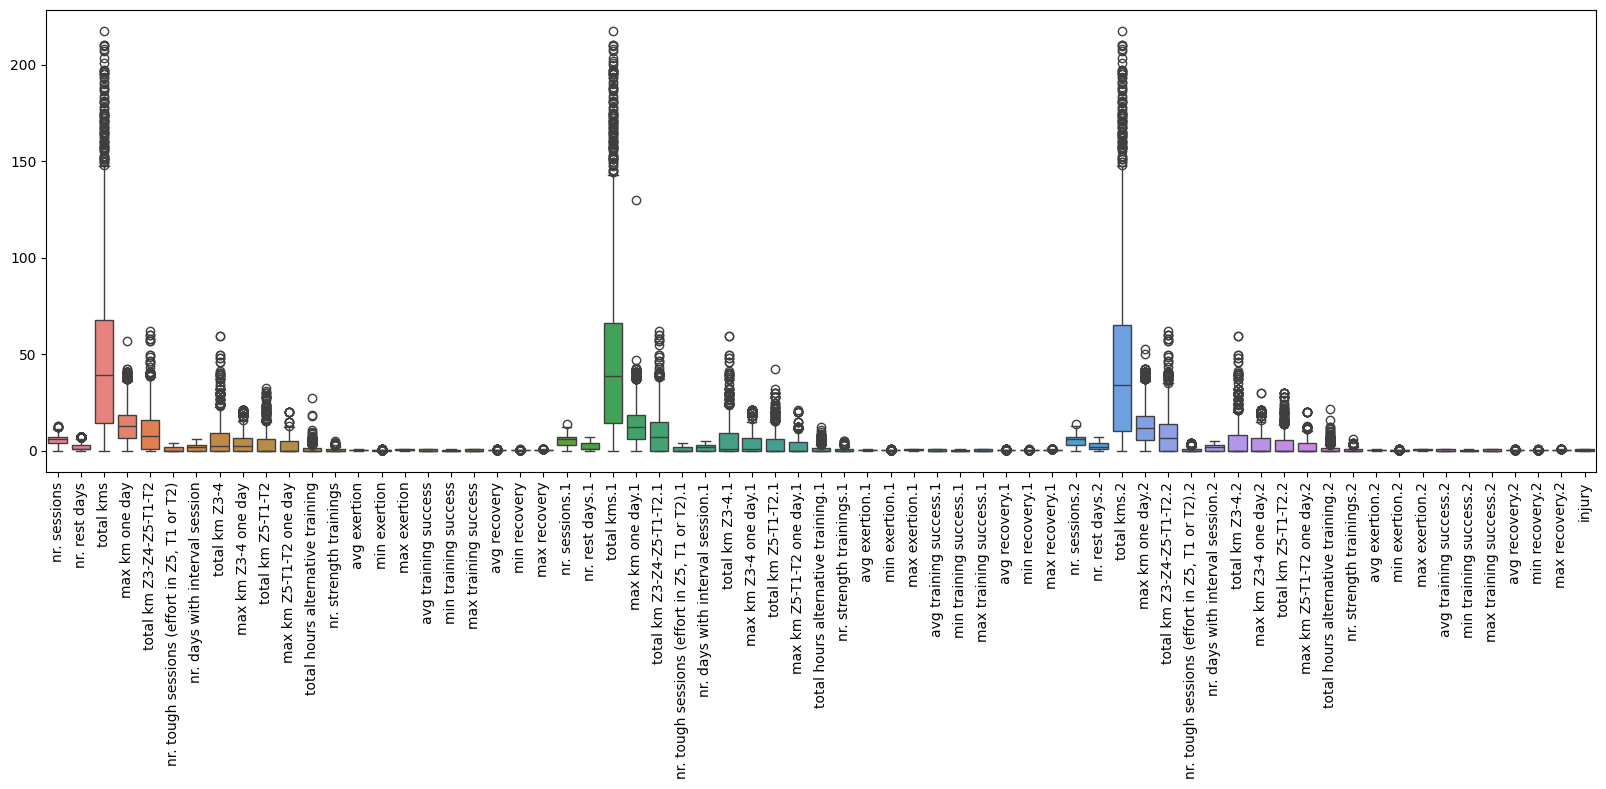

In [ ]:
plt.figure(figsize=(20, 6))
ax = sns.boxplot(data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Repare na discrepância de algumas colunas.

In [ ]:
# Transformando em dataframe pandas
df_padronizado = pd.DataFrame(df)

df_padronizado.columns = ['numero_sessoes', 'numero_dias_descanso', 'total_km', 'max_km_um_dia',
       'total_km_Z3-Z4-Z5-T1-T2', 'numero_sessoes_dificeis',
       'numero_dias_sessao_intervalo', 'total_km_Z3-4', 'max_km_Z3-4_um_dia',
       'total_km_Z5-T1-T2', 'max_km_Z5-T1-T2_um_dia',
       'total_horas_treinamento_alternativo', 'nr_treinos_forca',
       'media_esforco', 'minimo_esforco', 'maximo_esforco',
       'media_sucesso_treinamento', 'minimo_sucesso_treinamento',
       'maximo_sucesso_treinamento', 'media_recuperacao', 'minimo_recuperacao',
       'maximo_recuperacao', 'numero_sessoes_1', 'numero_dias_descanso_1',
       'total_km_1', 'max_km_um_dia_1', 'total_km_Z3-Z4-Z5-T1-T2_1',
       'numero_sessoes_dificeis_1',
       'numero_dias_sessao_intervalo_1', 'total_km_Z3-4_1',
       'max_km_Z3-4_um_dia_1', 'total_km_Z5-T1-T2_1',
       'max_km_Z5-T1-T2_um_dia_1', 'total_horas_treinamento_alternativo_1',
       'nr_treinos_forca_1', 'media_esforco_1', 'minimo_esforco_1',
       'maximo_esforco_1', 'media_sucesso_treinamento_1', 'minimo_sucesso_treinamento_1',
       'maximo_sucesso_treinamento_1', 'media_recuperacao_1', 'minimo_recuperacao_1',
       'maximo_recuperacao_1', 'numero_sessoes_2', 'numero_dias_descanso_2',
       'total_km_2', 'max_km_um_dia_2', 'total_km_Z3-Z4-Z5-T1-T2_2',
       'numero_sessoes_dificeis_2',
       'numero_dias_sessao_intervalo_2', 'total_km_Z3-4_2',
       'max_km_Z3-4_um_dia_2', 'total_km_Z5-T1-T2_2',
       'max_km_Z5-T1-T2_um_dia_2', 'total_horas_treinamento_alternativo_2',
       'nr_treinos_forca_2', 'media_esforco_2', 'minimo_esforco_2',
       'maximo_esforco_2', 'media_sucesso_treinamento_2',
       'minimo_sucesso_treinamento_2', 'maximo_sucesso_treinamento_2',
       'media_recuperacao_2', 'minimo_recuperacao_2', 'maximo_recuperacao_2',
       'lesao']

In [ ]:
cols = len(df_padronizado.axes[1])

print("Número de colunas:", cols)

Número de colunas: 67


In [ ]:
df_padronizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   numero_sessoes                         1150 non-null   float64
 1   numero_dias_descanso                   1150 non-null   float64
 2   total_km                               1150 non-null   float64
 3   max_km_um_dia                          1150 non-null   float64
 4   total_km_Z3-Z4-Z5-T1-T2                1150 non-null   float64
 5   numero_sessoes_dificeis                1150 non-null   float64
 6   numero_dias_sessao_intervalo           1150 non-null   float64
 7   total_km_Z3-4                          1150 non-null   float64
 8   max_km_Z3-4_um_dia                     1150 non-null   float64
 9   total_km_Z5-T1-T2                      1150 non-null   float64
 10  max_km_Z5-T1-T2_um_dia                 1150 non-null   float64
 11  tota

In [ ]:
df_padronizado.head()

,numero_sessoes,numero_dias_descanso,total_km,max_km_um_dia,total_km_Z3-Z4-Z5-T1-T2,numero_sessoes_dificeis,numero_dias_sessao_intervalo,total_km_Z3-4,max_km_Z3-4_um_dia,total_km_Z5-T1-T2,...,media_esforco_2,minimo_esforco_2,maximo_esforco_2,media_sucesso_treinamento_2,minimo_sucesso_treinamento_2,maximo_sucesso_treinamento_2,media_recuperacao_2,minimo_recuperacao_2,maximo_recuperacao_2,lesao
0,6.0,1.0,34.9,14.5,10.4,0.0,2.0,9.5,5.0,0.0,...,0.09,0.08,0.09,0.0,0.0,0.0,0.18,0.17,0.18,1
1,6.0,1.0,33.6,15.2,15.3,1.0,2.0,12.4,6.4,1.8,...,0.09,0.08,0.10,0.0,0.0,0.0,0.18,0.17,0.18,1
2,1.0,6.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.08,0.08,0.0,0.0,0.0,0.18,0.18,0.18,1
3,7.0,0.0,47.2,12.5,14.7,0.0,3.0,14.0,6.0,0.0,...,0.08,0.00,0.10,0.0,0.0,0.0,0.17,0.15,0.18,1
4,9.0,1.0,29.4,7.5,3.9,3.0,3.0,0.0,0.0,2.5,...,0.09,0.08,0.09,0.0,0.0,0.0,0.18,0.17,0.18,1


<ipython-input-31-04f1bb58c3d8>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


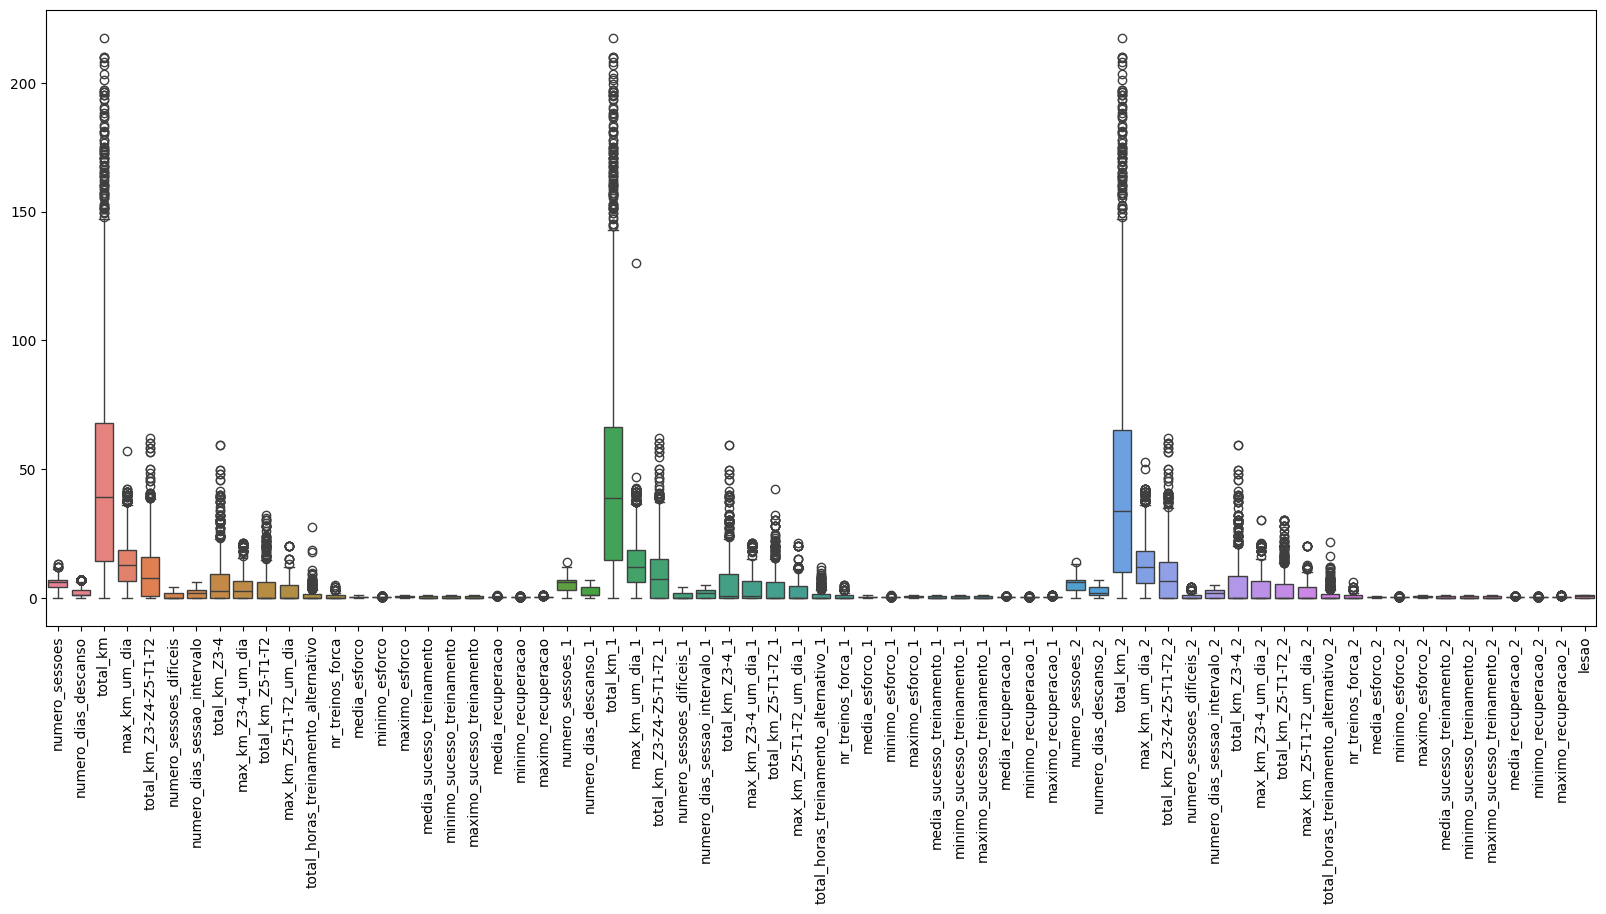

In [ ]:
plt.figure(figsize=(20,8))

ax = sns.boxplot(data=df_padronizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [ ]:
obj_normalizacao = MinMaxScaler().fit(df)
df_normalizado = obj_normalizacao.transform(df)

In [ ]:
df_normalizado

array([[0.46153846, 0.14285714, 0.16038603, ..., 0.24637681, 0.18      ,
        1.        ],
       [0.46153846, 0.14285714, 0.15441176, ..., 0.24637681, 0.18      ,
        1.        ],
       [0.07692308, 0.85714286, 0.03216912, ..., 0.26086957, 0.18      ,
        1.        ],
       ...,
       [0.61538462, 0.        , 0.43198529, ..., 0.20289855, 0.18      ,
        0.        ],
       [0.53846154, 0.        , 0.41957721, ..., 0.20289855, 0.18      ,
        0.        ],
       [0.53846154, 0.        , 0.43795956, ..., 0.20289855, 0.18      ,
        0.        ]])

In [ ]:
df_normalizado = pd.DataFrame(df_normalizado)

df_normalizado.columns = ['numero_sessoes', 'numero_dias_descanso', 'total_km', 'max_km_um_dia',
       'total_km_Z3-Z4-Z5-T1-T2', 'numero_sessoes_dificeis',
       'numero_dias_sessao_intervalo', 'total_km_Z3-4', 'max_km_Z3-4_um_dia',
       'total_km_Z5-T1-T2', 'max_km_Z5-T1-T2_um_dia',
       'total_horas_treinamento_alternativo', 'nr_treinos_forca',
       'media_esforco', 'minimo_esforco', 'maximo_esforco',
       'media_sucesso_treinamento', 'minimo_sucesso_treinamento',
       'maximo_sucesso_treinamento', 'media_recuperacao', 'minimo_recuperacao',
       'maximo_recuperacao', 'numero_sessoes_1', 'numero_dias_descanso_1',
       'total_km_1', 'max_km_um_dia_1', 'total_km_Z3-Z4-Z5-T1-T2_1',
       'numero_sessoes_dificeis_1',
       'numero_dias_sessao_intervalo_1', 'total_km_Z3-4_1',
       'max_km_Z3-4_um_dia_1', 'total_km_Z5-T1-T2_1',
       'max_km_Z5-T1-T2_um_dia_1', 'total_horas_treinamento_alternativo_1',
       'nr_treinos_forca_1', 'media_esforco_1', 'minimo_esforco_1',
       'maximo_esforco_1', 'media_sucesso_treinamento_1', 'minimo_sucesso_treinamento_1',
       'maximo_sucesso_treinamento_1', 'media_recuperacao_1', 'minimo_recuperacao_1',
       'maximo_recuperacao_1', 'numero_sessoes_2', 'numero_dias_descanso_2',
       'total_km_2', 'max_km_um_dia_2', 'total_km_Z3-Z4-Z5-T1-T2_2',
       'numero_sessoes_dificeis_2',
       'numero_dias_sessao_intervalo_2', 'total_km_Z3-4_2',
       'max_km_Z3-4_um_dia_2', 'total_km_Z5-T1-T2_2',
       'max_km_Z5-T1-T2_um_dia_2', 'total_horas_treinamento_alternativo_2',
       'nr_treinos_forca_2', 'media_esforco_2', 'minimo_esforco_2',
       'maximo_esforco_2', 'media_sucesso_treinamento_2',
       'minimo_sucesso_treinamento_2', 'maximo_sucesso_treinamento_2',
       'media_recuperacao_2', 'minimo_recuperacao_2', 'maximo_recuperacao_2',
       'lesao']

In [ ]:
df_normalizado.head() # Temos tudo na mesma escala, agora entre 0 e 1. Não mudamos os valores, apenas redimensionamos.

,numero_sessoes,numero_dias_descanso,total_km,max_km_um_dia,total_km_Z3-Z4-Z5-T1-T2,numero_sessoes_dificeis,numero_dias_sessao_intervalo,total_km_Z3-4,max_km_Z3-4_um_dia,total_km_Z5-T1-T2,...,media_esforco_2,minimo_esforco_2,maximo_esforco_2,media_sucesso_treinamento_2,minimo_sucesso_treinamento_2,maximo_sucesso_treinamento_2,media_recuperacao_2,minimo_recuperacao_2,maximo_recuperacao_2,lesao
0,0.461538,0.142857,0.160386,0.254386,0.167472,0.00,0.333333,0.159664,0.236967,0.000000,...,0.115385,0.109589,0.09,0.0,0.0,0.0,0.240000,0.246377,0.18,1.0
1,0.461538,0.142857,0.154412,0.266667,0.246377,0.25,0.333333,0.208403,0.303318,0.055728,...,0.115385,0.109589,0.10,0.0,0.0,0.0,0.240000,0.246377,0.18,1.0
2,0.076923,0.857143,0.032169,0.122807,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.102564,0.109589,0.08,0.0,0.0,0.0,0.240000,0.260870,0.18,1.0
3,0.538462,0.000000,0.216912,0.219298,0.236715,0.00,0.500000,0.235294,0.284360,0.000000,...,0.102564,0.000000,0.10,0.0,0.0,0.0,0.226667,0.217391,0.18,1.0
4,0.692308,0.142857,0.135110,0.131579,0.062802,0.75,0.500000,0.000000,0.000000,0.077399,...,0.115385,0.109589,0.09,0.0,0.0,0.0,0.240000,0.246377,0.18,1.0


In [ ]:
df_normalizado.describe()

,numero_sessoes,numero_dias_descanso,total_km,max_km_um_dia,total_km_Z3-Z4-Z5-T1-T2,numero_sessoes_dificeis,numero_dias_sessao_intervalo,total_km_Z3-4,max_km_Z3-4_um_dia,total_km_Z5-T1-T2,...,media_esforco_2,minimo_esforco_2,maximo_esforco_2,media_sucesso_treinamento_2,minimo_sucesso_treinamento_2,maximo_sucesso_treinamento_2,media_recuperacao_2,minimo_recuperacao_2,maximo_recuperacao_2,lesao
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,...,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,0.403144,0.336646,0.229359,0.244813,0.167403,0.211087,0.281739,0.102387,0.191659,0.115819,...,0.293378,0.191590,0.329504,0.270478,0.198496,0.320609,0.267791,0.219143,0.261800,0.500000
std,0.232096,0.349720,0.225563,0.194599,0.173742,0.261292,0.213292,0.151635,0.247277,0.178458,...,0.277550,0.197219,0.321232,0.343651,0.277539,0.403284,0.203177,0.166937,0.221388,0.500218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.307692,0.142857,0.065947,0.112719,0.011272,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.115385,0.082192,0.100000,0.000000,0.000000,0.000000,0.186667,0.130435,0.160000,0.000000
50%,0.461538,0.142857,0.179228,0.224561,0.122383,0.000000,0.333333,0.040336,0.113744,0.000000,...,0.166667,0.136986,0.160000,0.000000,0.000000,0.000000,0.226667,0.231884,0.180000,0.500000
75%,0.538462,0.428571,0.311121,0.324561,0.255636,0.500000,0.500000,0.155882,0.303318,0.185759,...,0.538462,0.256849,0.680000,0.650000,0.467500,0.790000,0.373333,0.260870,0.400000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-37-c0ac03041a4a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


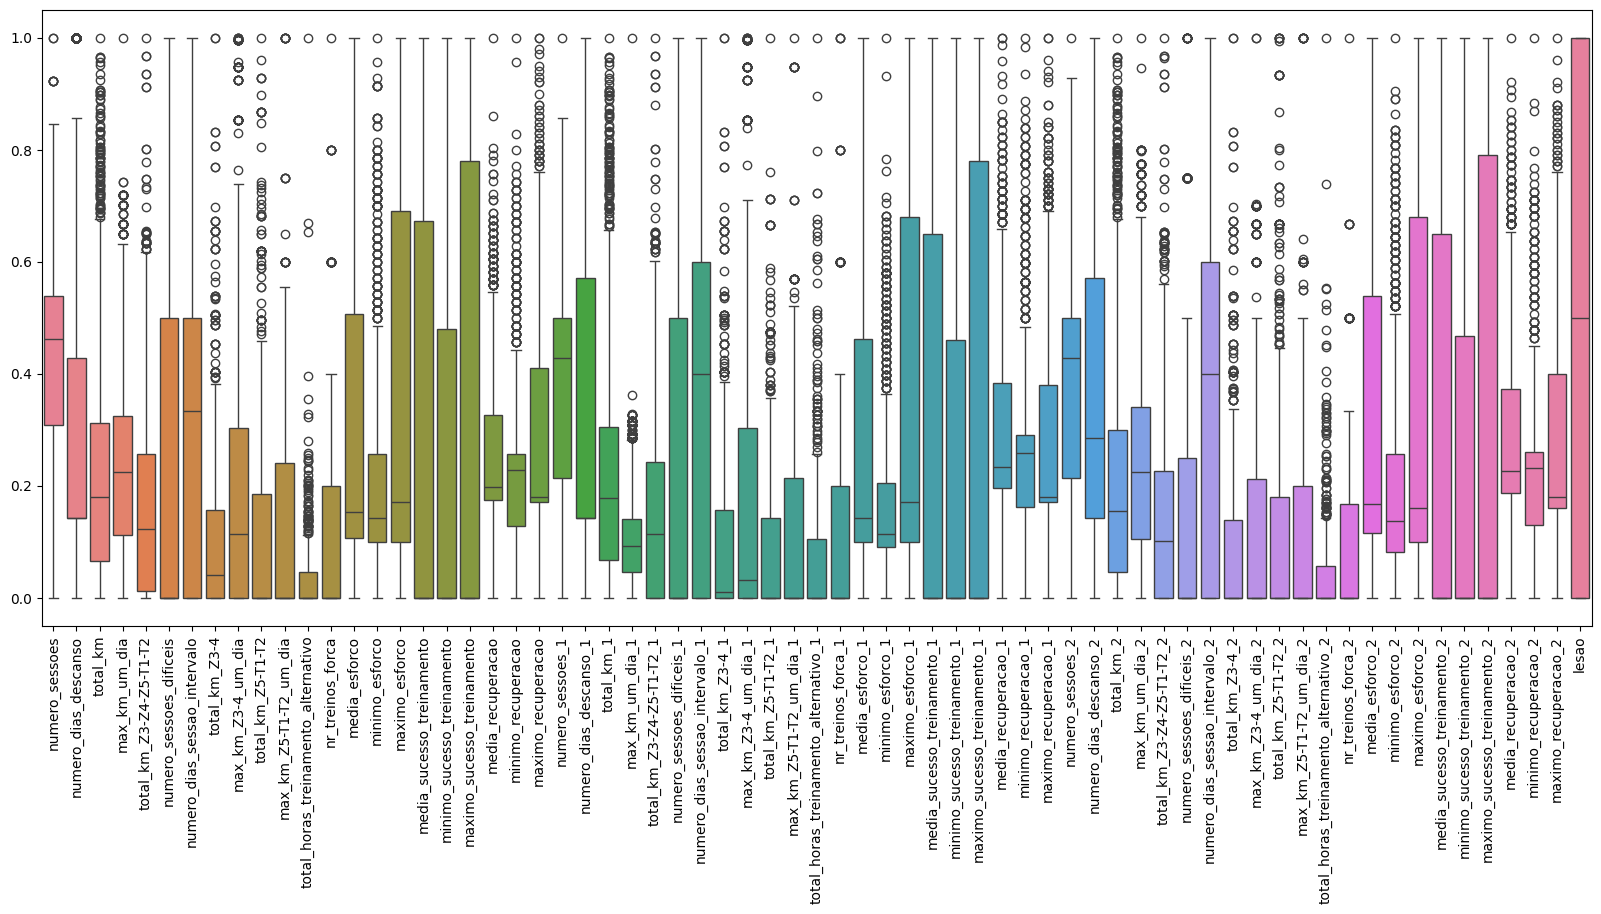

In [ ]:
plt.figure(figsize=(20,8))

ax = sns.boxplot(data=df_normalizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Agora temos um mínimo de 0 e um máximo de um(dados normais)

para usar o padronizado use: df_padronizado <br>
para usar o normalizado use: df_normalizado <br>
para usar o dataset original use: df <br>

AVISO: Para uso no modelo de rede neural, deve-se usar a coluna target original(lesionado/não-lesionado)

# Separando os dados entre Treino e Teste

In [ ]:
# NORMALIZADO

VAR_PREDITORAS_NORMALIZADO = np.array(df_normalizado.drop("lesao", axis=1))
VAR_TARGET = np.array(df["injury"]) # o target sempre é o original

In [ ]:
# Separando em treino e teste

X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_NORMALIZADO, VAR_TARGET, test_size = 0.2, random_state=10)

# Rede neural

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers

In [ ]:
df['injury'].count()
BATCH_SIZE = 16
RANDOM_STATE = 2

**Colocando a quantidade de neurônios de acordo com a regra de ouro**

In [ ]:
# NORMALIZADO
VAR_PREDITORAS_NORMALIZADO = np.array(df_normalizado.drop("lesao", axis=1))
VAR_TARGET = np.array(df["injury"]) # o target sempre é o original

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(VAR_PREDITORAS_NORMALIZADO, VAR_TARGET, test_size = 0.2, random_state=RANDOM_STATE)

# Criando a Rede Neural de acordo com a dimVc
model = Sequential()
model.add(Dense(2, input_dim=66, kernel_initializer='normal', activation='relu')) # primeira camada escondida
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) # camada de saída

# Gradiente Descendente
sgd = optimizers.SGD(learning_rate=0.01)

# Usando Entropia Cruzada
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

print(model.summary())

# Dividindo em dados de treino e validação
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=RANDOM_STATE, test_size=0.2)

# Treinando o modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 134       
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
46/46 [==============================] - 1s 11ms/step - loss: 0.6913 - accuracy: 0.5068 - val_loss: 0.6880 - val_accuracy: 0.4946
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 0.6793 - accuracy: 0.5978 - val_loss: 0.6700 - val_accuracy: 0.8043
Epoch 3/100
46/46 [==============================] - 0s 6ms/step - loss: 0.6534 - accuracy: 0.8193 - val_loss: 0.6411 - val_ac

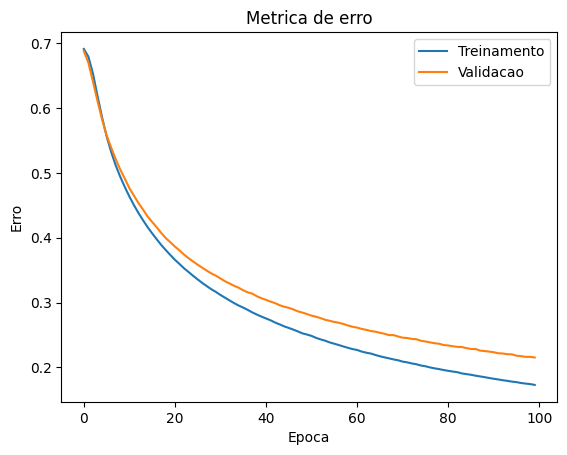

23/23 [==============================] - 0s 1ms/step
--> Acuracia (treino): 0.9484
6/6 [==============================] - 0s 4ms/step
--> Acuracia (validação): 0.9239

E_in - E_val = -0.04
acc_in - acc_val = 0.02


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
print(f'--> Acuracia (treino): {accuracy_score(y_train, pred):.4f}')
acc_train = accuracy_score(y_train, pred)
erro_train = history.history['loss'][-1]

pred = np.round(model.predict(X_val))
print(f'--> Acuracia (validação): {accuracy_score(y_val, pred):.4f}')
acc_val = accuracy_score(y_val, pred)
erro_val = history.history['val_loss'][-1]

print(f"\nE_in - E_val = {erro_train - erro_val:.2f}")
print(f"acc_in - acc_val = {acc_train - acc_val:.2f}")

**Gerando Overfitting**

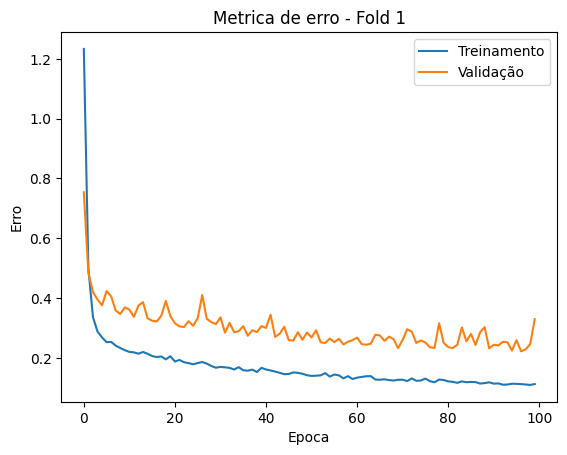

--> Acuracia (treino): 0.9715
--> Acuracia (validacao): 0.8859
--> E_val - E_in = 0.2169
--> acc_in - acc_val = 0.0856



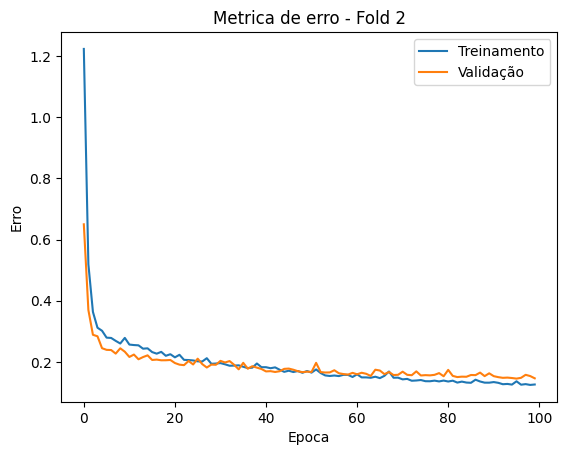

--> Acuracia (treino): 0.9905
--> Acuracia (validacao): 0.9837
--> E_val - E_in = 0.0202
--> acc_in - acc_val = 0.0068



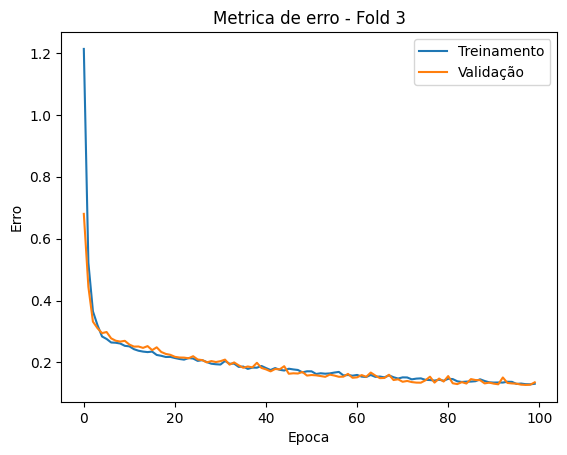

--> Acuracia (treino): 0.9796
--> Acuracia (validacao): 0.9620
--> E_val - E_in = 0.0048
--> acc_in - acc_val = 0.0177



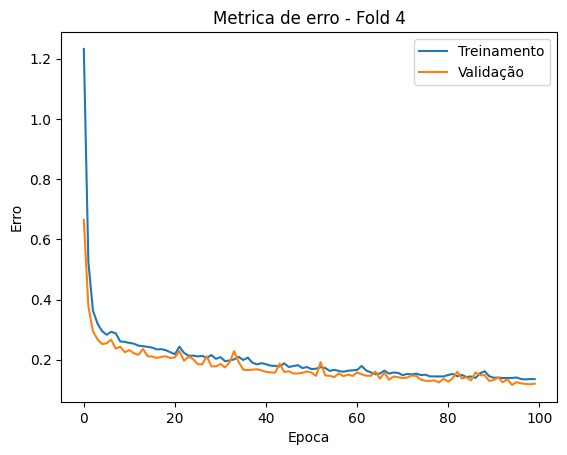

--> Acuracia (treino): 0.9878
--> Acuracia (validacao): 0.9837
--> E_val - E_in = -0.0150
--> acc_in - acc_val = 0.0041



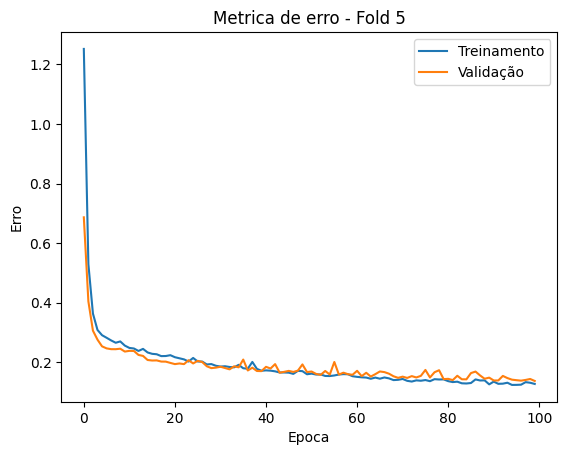

--> Acuracia (treino): 0.9742
--> Acuracia (validacao): 0.9837
--> E_val - E_in = 0.0100
--> acc_in - acc_val = -0.0095



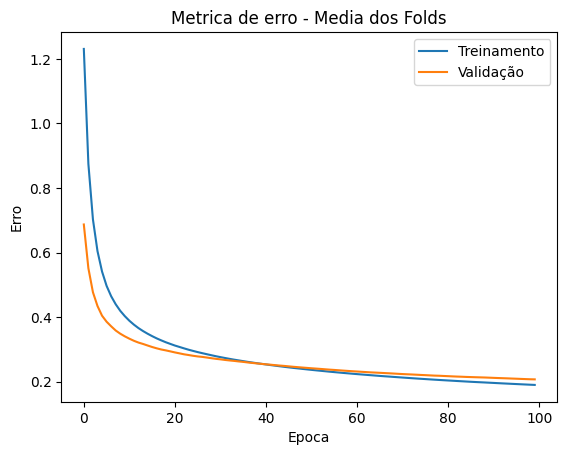

--> Acuracia (treino): 0.9807
--> Acuracia (validacao): 0.9598
--> E_val - E_in = 0.0172
--> acc_in - acc_val = -0.0095



In [ ]:
from sklearn.model_selection import StratifiedKFold

# Dividindo os dados originais em treino e teste
X_train, X_test, y_train, y_test = train_test_split(VAR_PREDITORAS_NORMALIZADO, VAR_TARGET, test_size = 0.2, random_state=RANDOM_STATE)

# Garante o balanceamento nos folds
skf = StratifiedKFold(n_splits=5, shuffle=True) # folds -> pegar a media de n_splits partições

accuracies_train = []
accuracies_val = []
history_list = []

# Realiza o k-fold cross validation
i = 0
for train_index,val_index in skf.split(X_train, y_train):
    i = i + 1
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Criando a arquitetura da rede neural
    model = Sequential()
    model.add(Dense(200, input_dim=66, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model.add(Dense(200, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    # sigmoid + entropia_cruzada -> probabilidade
    # Compilar o modelo
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

    # Treina o modelo
    history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=100, batch_size=BATCH_SIZE, verbose=0)
    history_list.append(history)

    # Avalia o modelo
    _, accuracy_train = model.evaluate(X_train_fold, y_train_fold, batch_size=16, verbose=0)
    _, accuracy_val = model.evaluate(X_val_fold, y_val_fold, batch_size=16, verbose=0)
    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)

    # Exibe o historico de treinamento para um fold especifico
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento', 'Validação'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
    print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")
    print(f"--> acc_in - acc_val = {accuracy_train - accuracy_val:.4f}\n")

# Calcula a acuracia media
avg_accuracy_train = np.mean(accuracies_train)
avg_accuracy_val = np.mean(accuracies_val)

# Historico com valores medios dos folds de acordo com as n_splits partições
history_loss_avg = []
history_val_loss_avg = []
aux_list1 = []
aux_list2 = []

for i in range(len(history.history['loss'])):
    for j in range(len(history_list)):
        aux_list1.append(history_list[j].history['loss'][i])
        aux_list2.append(history_list[j].history['val_loss'][i])
    history_loss_avg.append(np.mean(aux_list1))
    history_val_loss_avg.append(np.mean(aux_list2))

plt.plot(history_loss_avg)
plt.plot(history_val_loss_avg)
plt.title('Metrica de erro - Media dos Folds')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validação'])
plt.show()

print(f'--> Acuracia (treino): {avg_accuracy_train:.4f}')
print(f'--> Acuracia (validacao): {avg_accuracy_val:.4f}')
print(f"--> E_val - E_in = {(history_val_loss_avg[-1] - history_loss_avg[-1]):.4f}")
print(f"--> acc_in - acc_val = {accuracy_train - accuracy_val:.4f}\n")

In [ ]:
_, accuracy_test = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)
accuracy_test

0.939130425453186

# Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

X = np.array(df.drop("injury", axis=1))
y = np.array(df["injury"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Treinamento do modelo sem Regularização

In [ ]:
# Treinar o modelo
clf = DecisionTreeClassifier(random_state=0) # clf = classificador
clf.fit(X_train, y_train)

# Printar E_in e E_out
print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
# Calcula a diferença entre o erro de treino e de teste, para verificar a presença de overfitting.
print('Ein - Eout: %0.4f' % ((1 - accuracy_score(y_train, clf.predict(X_train))) - (1 - accuracy_score(y_test, clf.predict(X_test)))))

# Printar tabela de acurácia
print(classification_report(y_test, clf.predict(X_test)))

Ein: 0.0043
Eout: 0.0261
Ein - Eout: -0.0217
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       125
           1       0.99      0.95      0.97       105

    accuracy                           0.97       230
   macro avg       0.98      0.97      0.97       230
weighted avg       0.97      0.97      0.97       230



-> Teve Overtting, ou seja, não ocorreu generalização

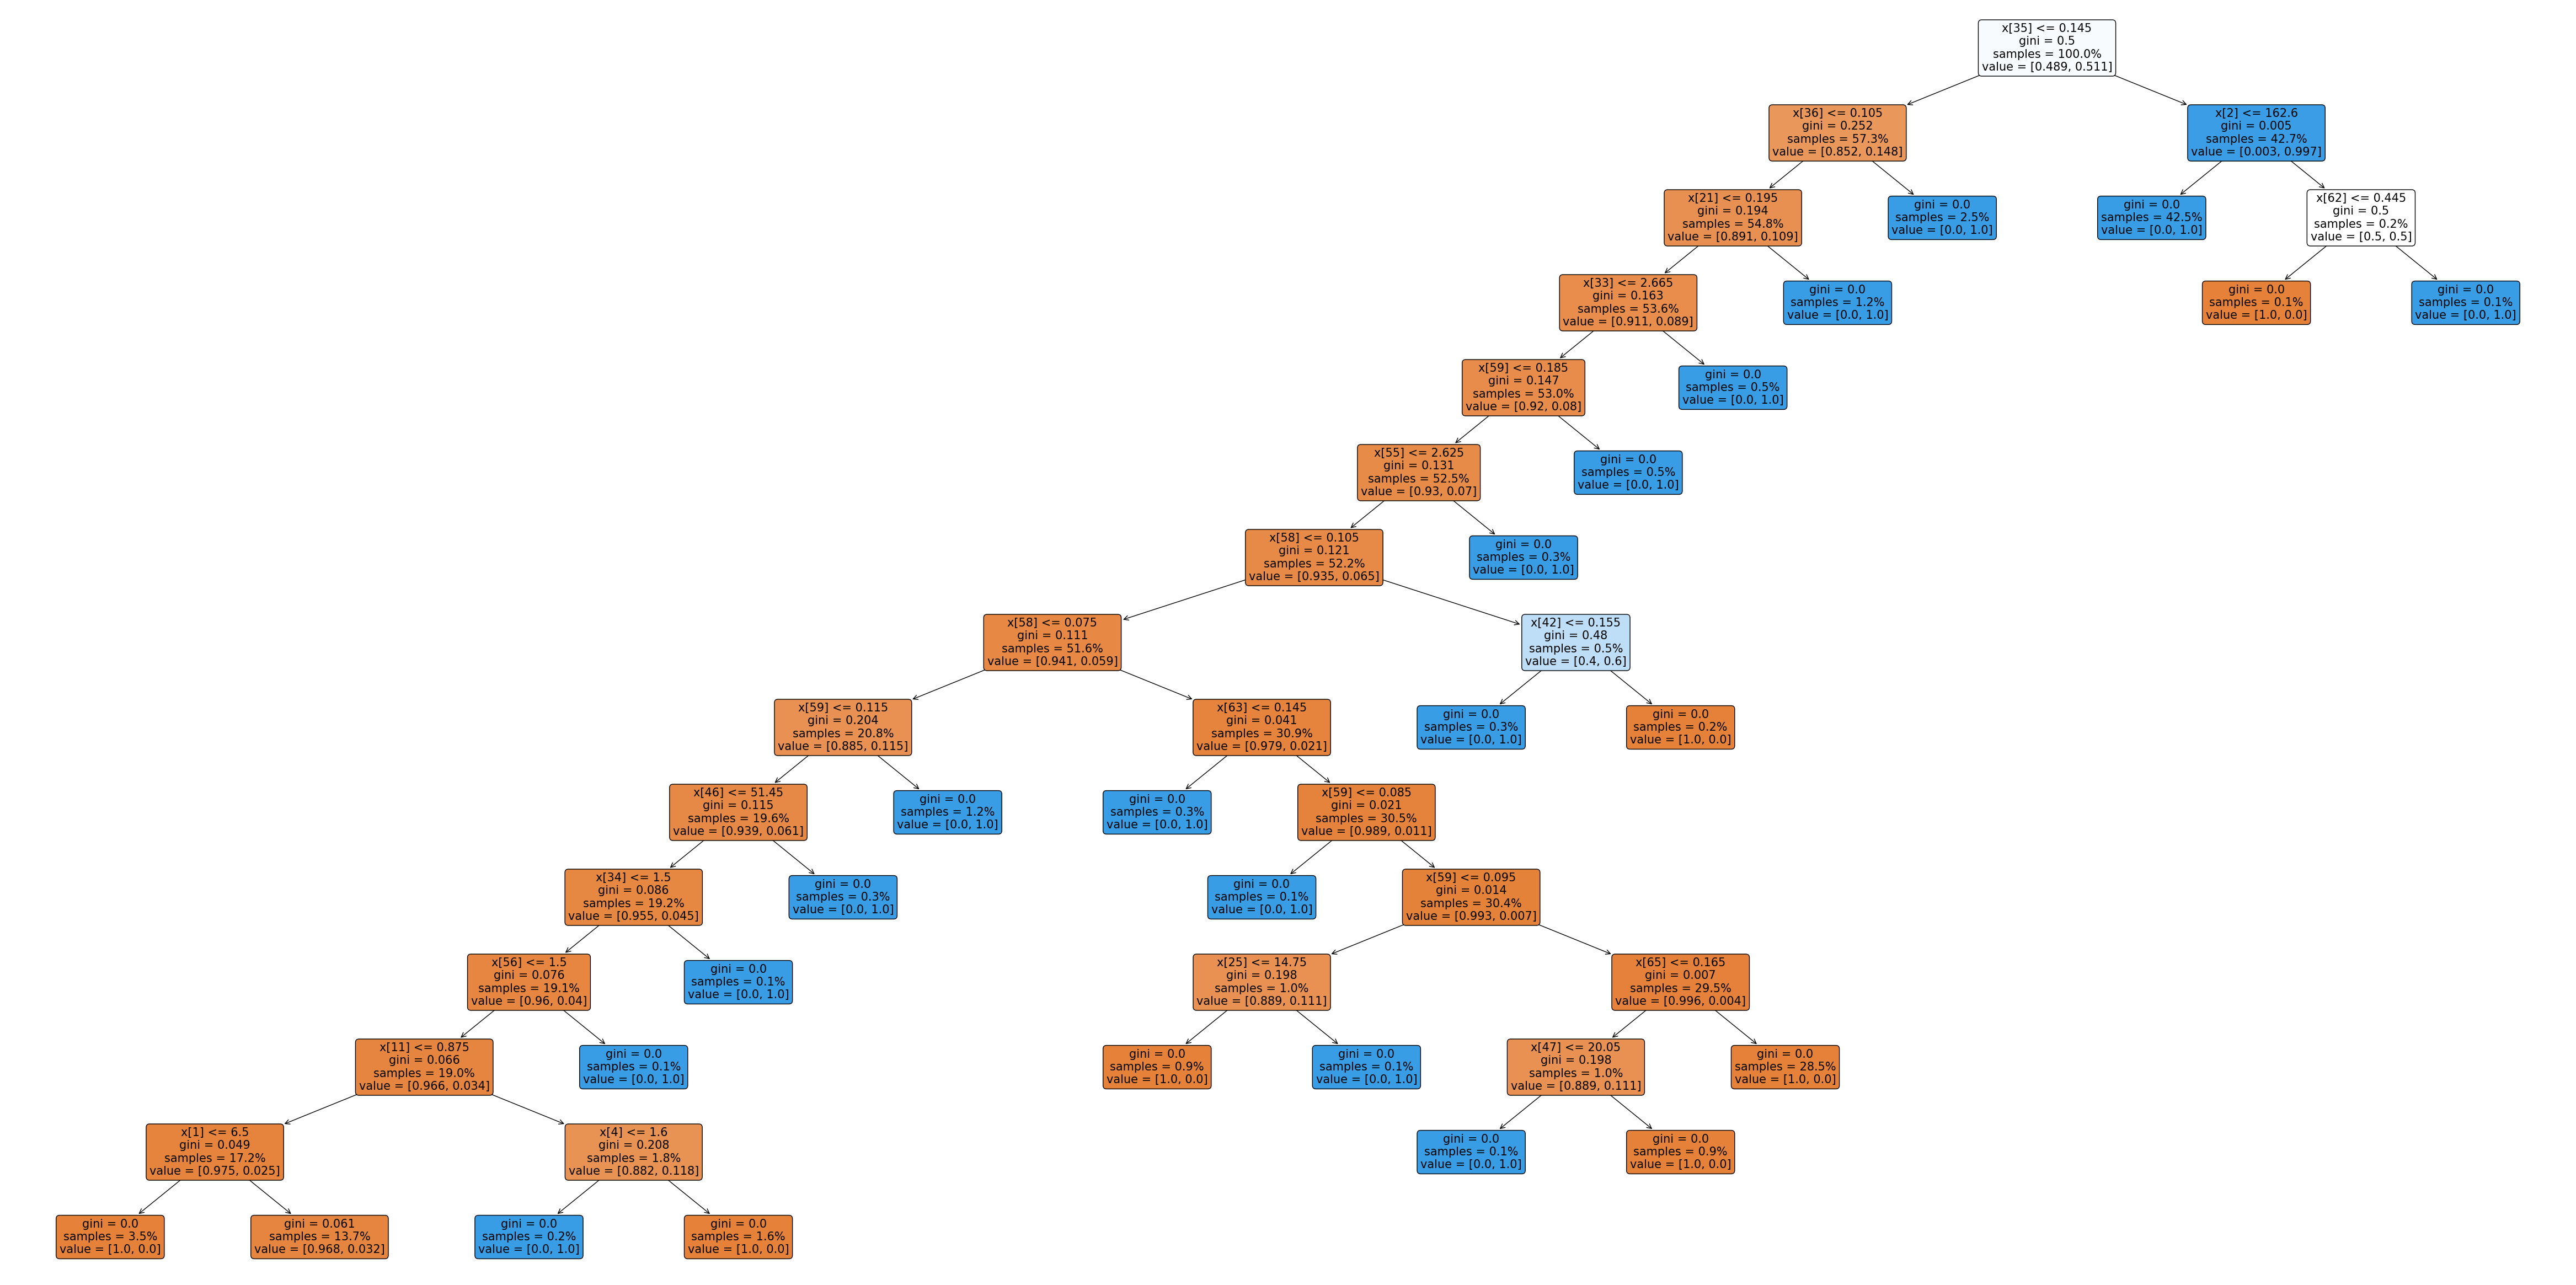

In [ ]:
# Desenho da árvore sem regularização
plt.figure(figsize=(60,30))
plot_tree(
    clf,
    filled=True,
    proportion = True,
    fontsize=15,
    rounded = True)
plt.show()

## Treinamento do modelo com Regularização

- Observando alfas no gráfico

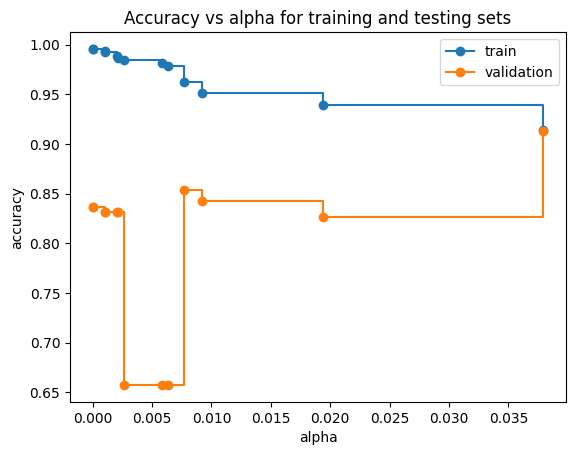

In [ ]:
# Recupera os valores efetivos de alpha para a elaboração da fase de prunning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Descarta o último por ser trivial (apenas o nó raiz)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Gráfico
train_scores = [clf.score(X_train, y_train) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

Ein: 0.0859
Eout: 0.0652
Ein - Eout: 0.0207
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       1.00      0.86      0.92       105

    accuracy                           0.93       230
   macro avg       0.95      0.93      0.93       230
weighted avg       0.94      0.93      0.93       230



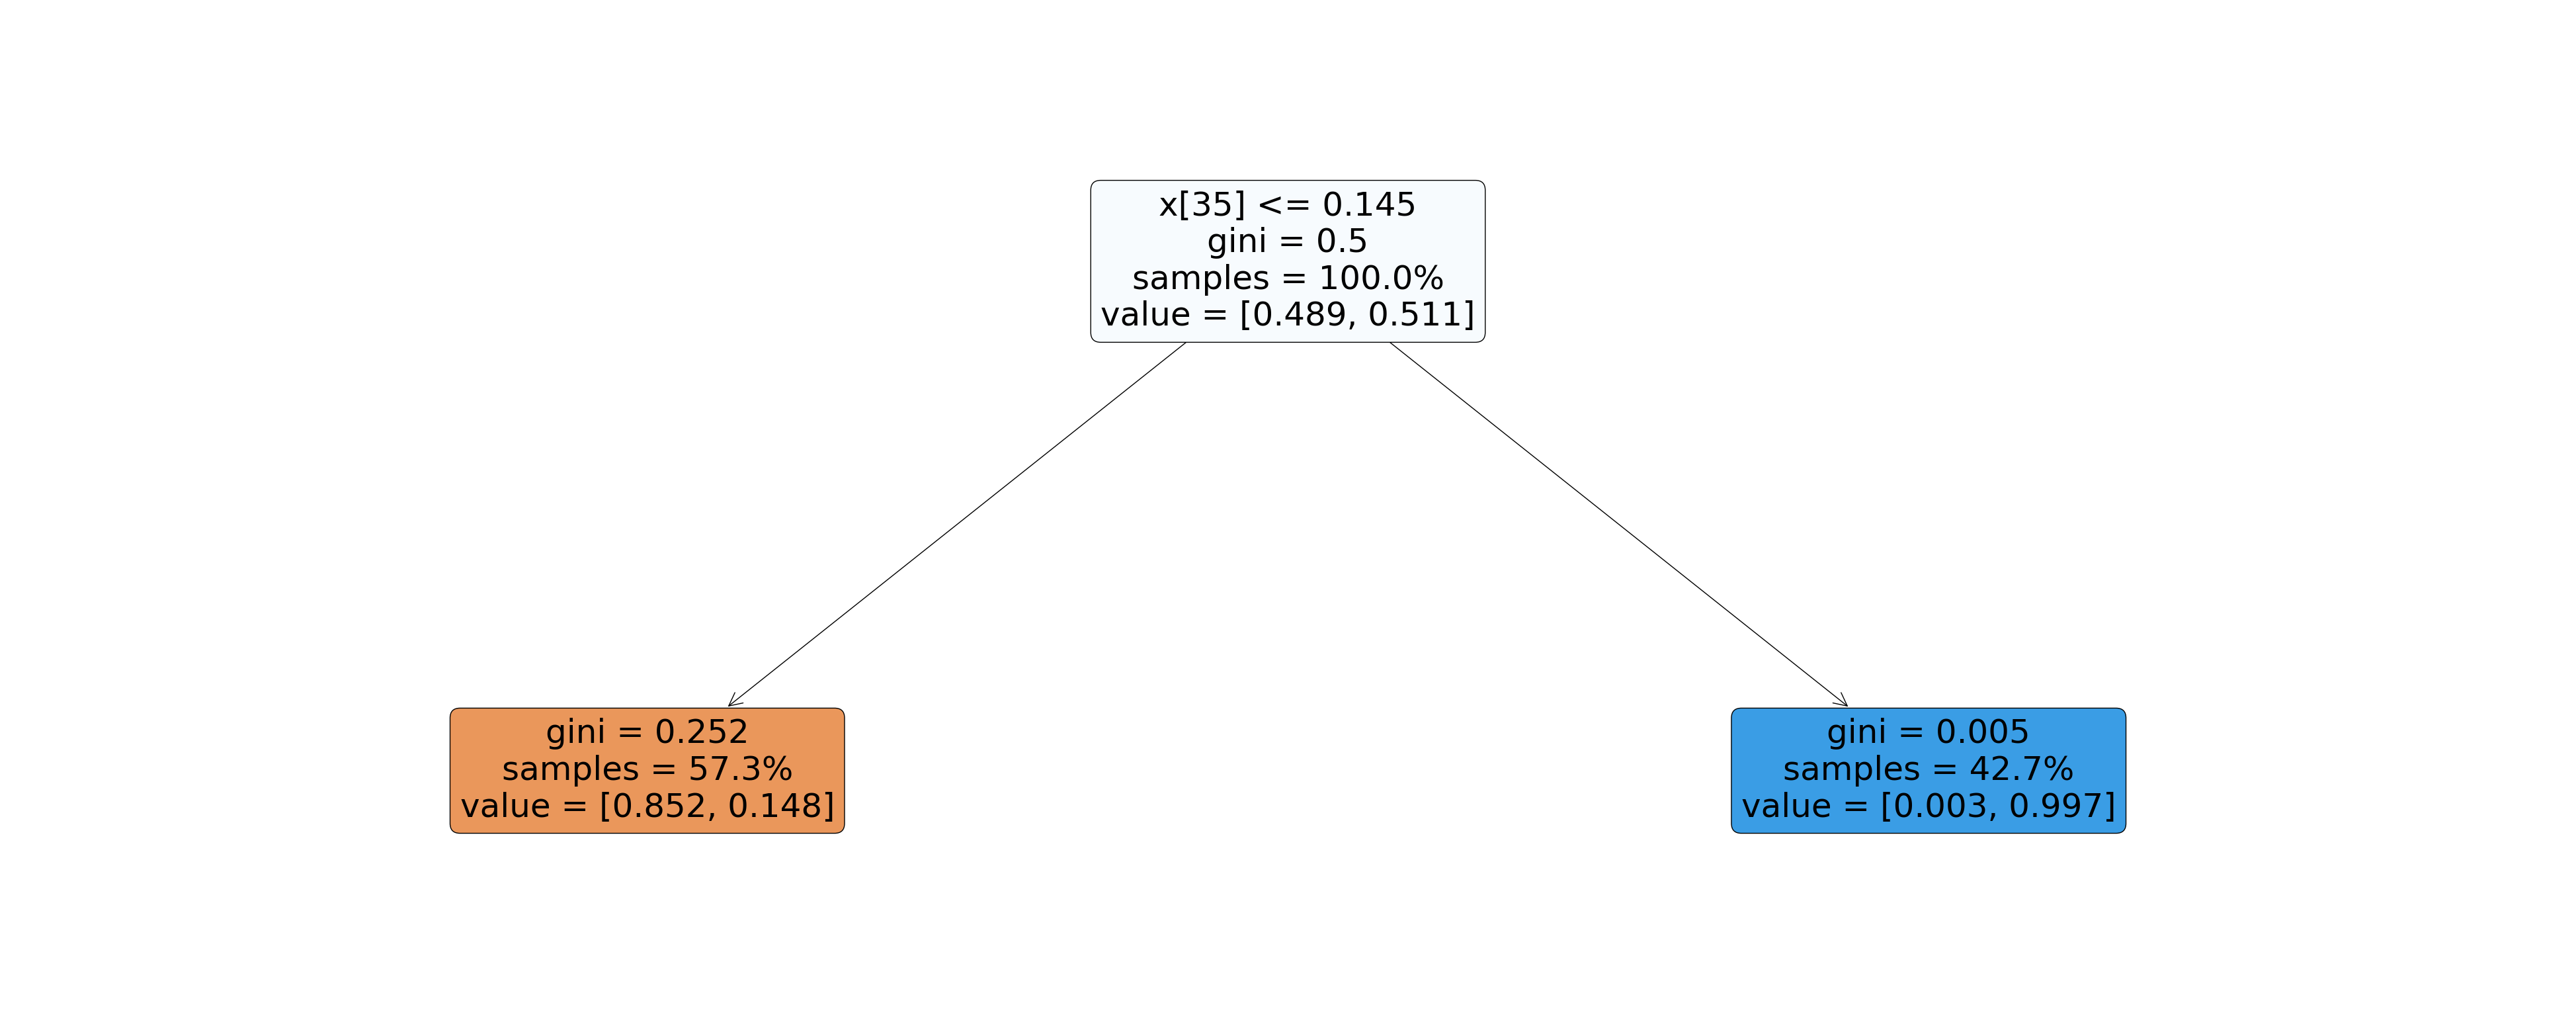

In [ ]:
# Pegando o melhor alfa sem GridSearch
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0388338227)
clf.fit(X_train, y_train)

# Erros
print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print('Ein - Eout: %0.4f' % ((1 - accuracy_score(y_train, clf.predict(X_train))) - (1 - accuracy_score(y_test, clf.predict(X_test)))))
print(classification_report(y_test, clf.predict(X_test)))

# Desenho da árvore
plt.figure(figsize=(50,20))
plot_tree(
    clf,
    filled=True,
    proportion = True,
    fontsize=36,
    rounded = True)
plt.show()

- Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)

param_grid = {'ccp_alpha': path.ccp_alphas}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 5, verbose=0, n_jobs=-1)
CV_clf.fit(X_train, y_train)

# E_in e E_out
print('Ein: %0.4f' % (1 - accuracy_score(y_train, CV_clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, CV_clf.predict(X_test))))
print('Ein - Eout: %0.4f' % ((1 - accuracy_score(y_train, CV_clf.predict(X_train))) - (1 - accuracy_score(y_test, CV_clf.predict(X_test)))))

# Tabela de Informações do resultado do modelo
print(classification_report(y_test, CV_clf.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Ein: 0.0065
Eout: 0.0435
Ein - Eout: -0.0370
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       116
           1       0.99      0.92      0.95       114

    accuracy                           0.96       230
   macro avg       0.96      0.96      0.96       230
weighted avg       0.96      0.96      0.96       230



In [ ]:
cpp_best_alpha = CV_clf.best_params_.get('ccp_alpha')
cpp_best_alpha

0.0014492753623188406

- Melhor árvore

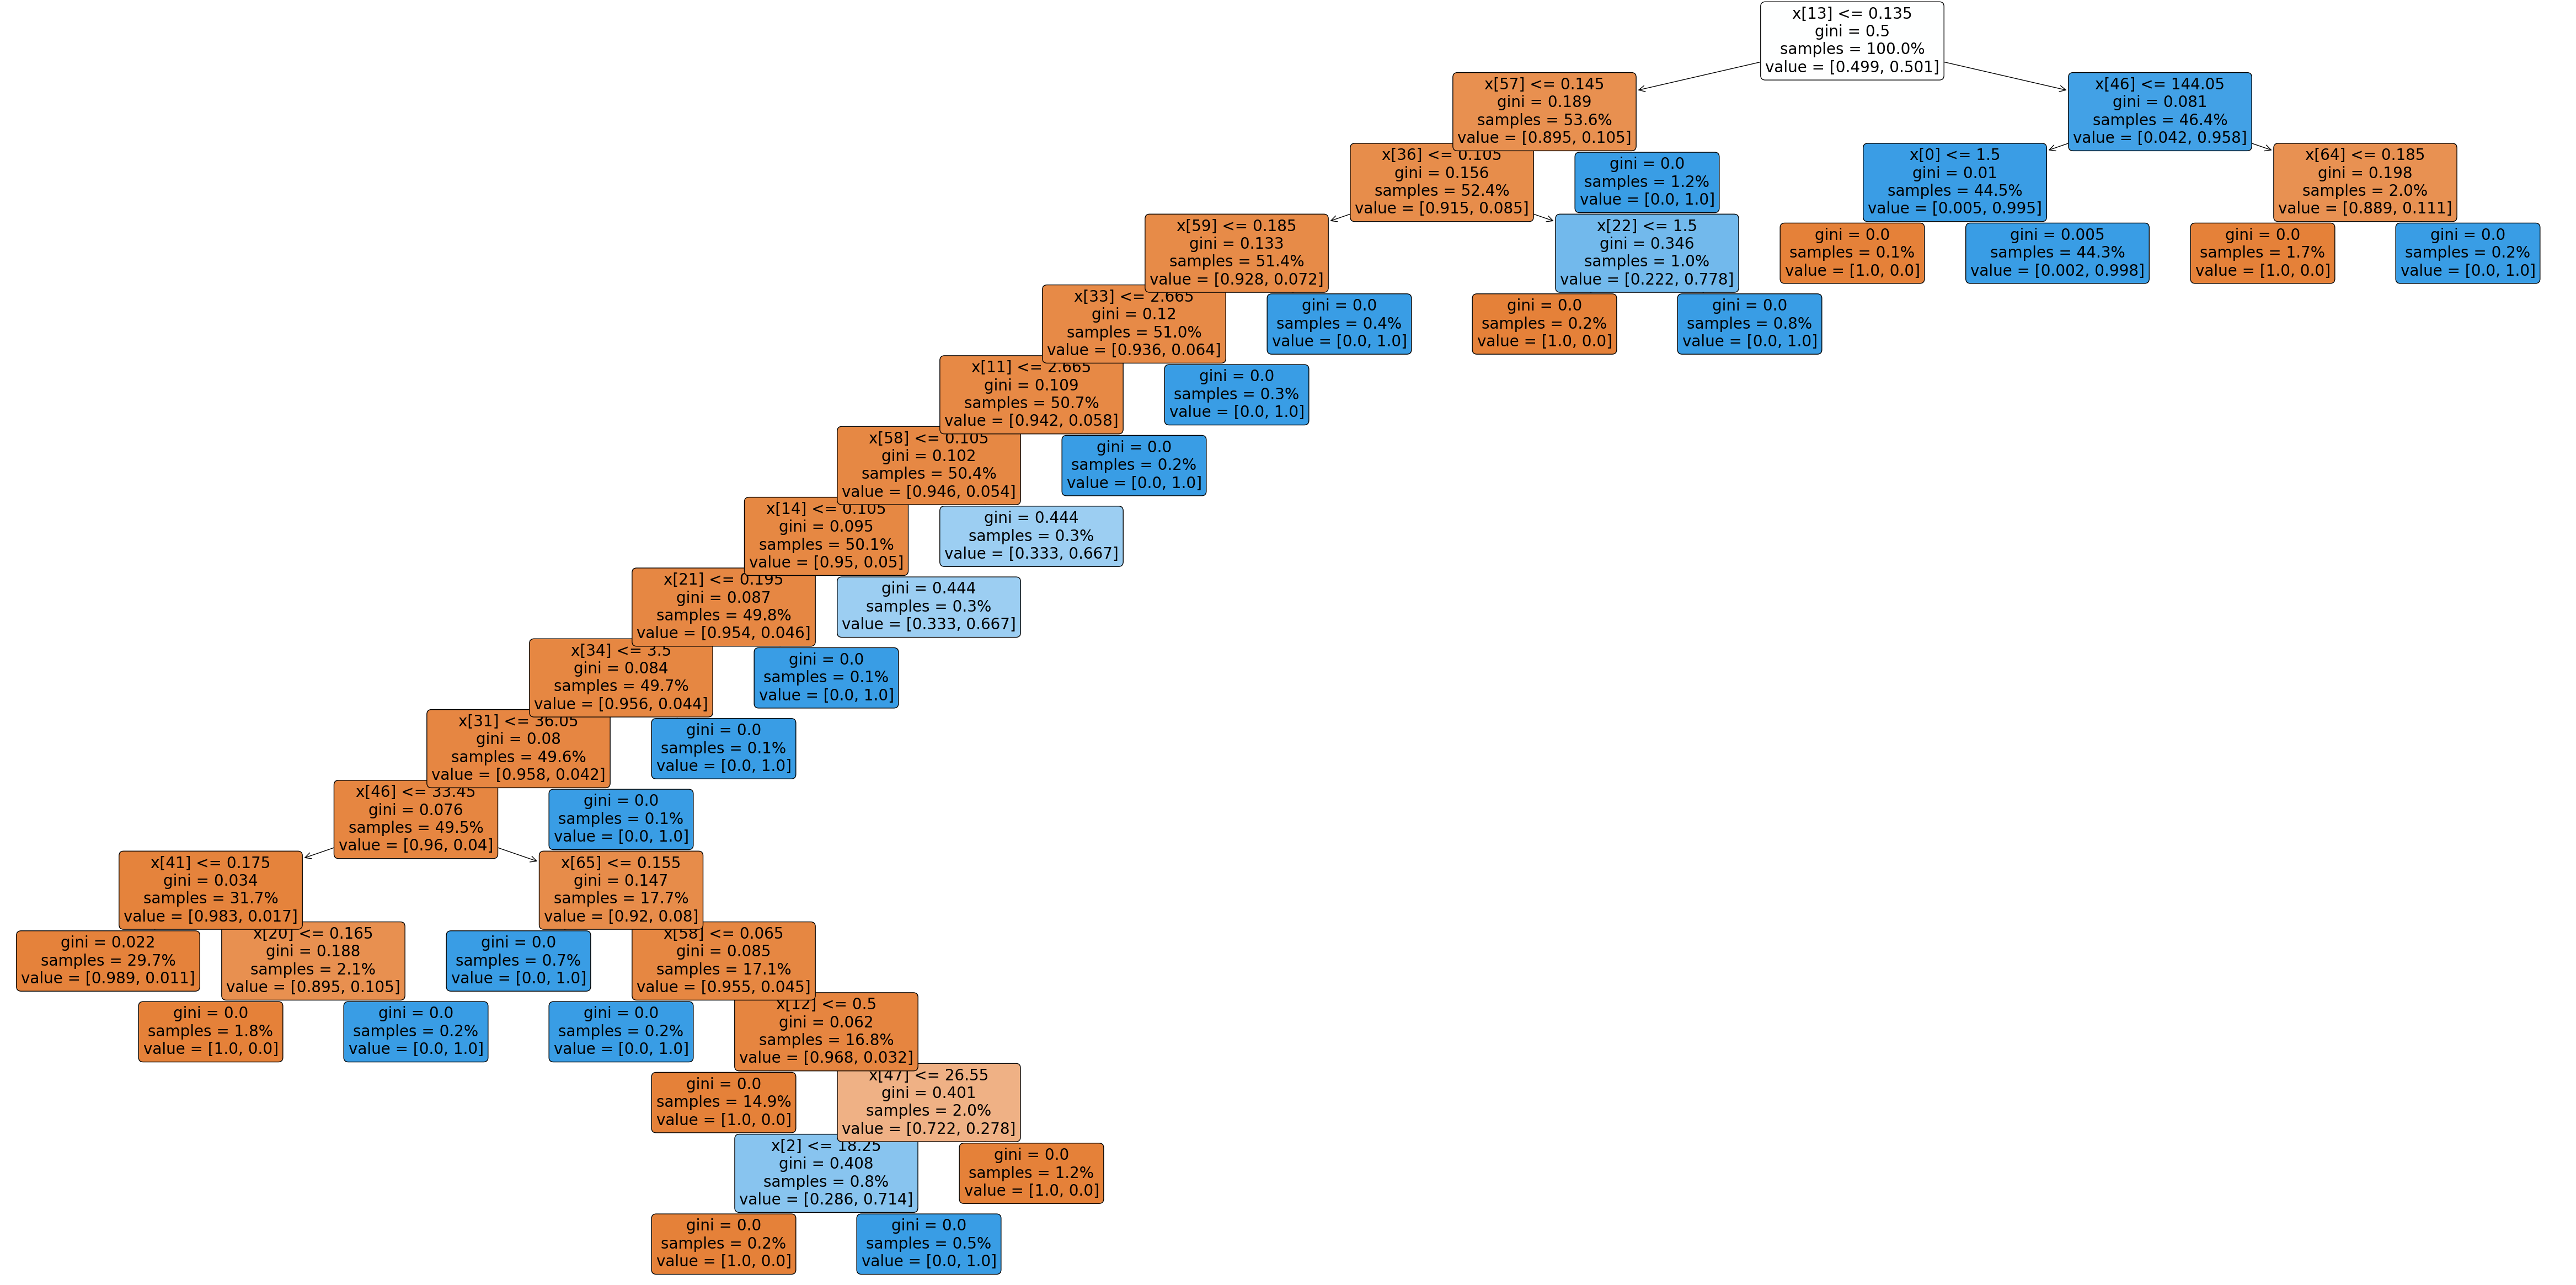

In [ ]:
# Treinando o modelo para o alfa específico da melhor escolha
clf = DecisionTreeClassifier(random_state=0, ccp_alpha = cpp_best_alpha )
clf.fit(X_train, y_train)

# Desenho da melhor árvore
plt.figure(figsize=(60,30))
plot_tree(
    clf,
    filled=True,
    proportion = True,
    fontsize=20,
    rounded = True)
plt.show()